In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.applications.efficientnet import EfficientNetB0
from keras.preprocessing.image import load_img
import tensorflow as tf

        
validation_dir = r'/kaggle/input/ferdata/test'
train_dir = r'/kaggle/input/ferdata/train'
picture_size = 48

In [6]:
no_of_classes = 7
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(validation_dir,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
model = keras.Sequential([
# Data Augmentation 
  

  EfficientNetB0(weights='imagenet',include_top=False, classes=no_of_classes, input_shape=(48,48,3)), #Extract features 

  layers.BatchNormalization(),
#CNN layer 

  layers.Conv2D(256,(3,3),padding = 'same'), 
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.1),
  layers.Conv2D(512,(3,3),padding = 'same'), 
  layers.BatchNormalization(),
  layers.LeakyReLU(alpha=0.1),
  layers.MaxPooling2D(pool_size = (2,2),padding = 'same'), 
  layers.Dropout(0.25), 


  layers.Flatten(),
#Fully connected 1st layer 

  layers.Dense(256),
  layers.BatchNormalization(), 
  layers.Activation('relu'), 
  layers.Dropout(0.25), 

# Fully connected layer 2nd layer

  layers.Dense(512),
  layers.BatchNormalization(), 
  layers.Activation('relu'), 
  layers.Dropout(0.25), 


  layers.Dense(no_of_classes, activation='softmax'),
                          
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 2, 2, 1280)        4049571   
_________________________________________________________________
batch_normalization_6 (Batch (None, 2, 2, 1280)        5120      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         2949376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 2, 2, 256)         1024      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 512)         1180160   
_________________________________________________________________
batch_normalization_8 (Batch (None, 2, 2, 512)        

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=3, 
    restore_best_weights=True,
)

epochs = 25

model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=[early_stopping],
                                )

Epoch 1/25
224/224 [==============================] - 134s 559ms/step - loss: 1.5626 - accuracy: 0.4013 - val_loss: 1.8296 - val_accuracy: 0.4298
Epoch 2/25
224/224 [==============================] - 34s 151ms/step - loss: 1.2236 - accuracy: 0.5461 - val_loss: 1.3040 - val_accuracy: 0.5010
Epoch 3/25
224/224 [==============================] - 34s 151ms/step - loss: 1.0737 - accuracy: 0.6057 - val_loss: 1.1995 - val_accuracy: 0.5698
Epoch 4/25
224/224 [==============================] - 31s 140ms/step - loss: 0.9432 - accuracy: 0.6527 - val_loss: 1.2245 - val_accuracy: 0.5756
Epoch 5/25
224/224 [==============================] - 29s 129ms/step - loss: 0.8435 - accuracy: 0.6938 - val_loss: 1.1747 - val_accuracy: 0.5919
Epoch 6/25
224/224 [==============================] - 29s 128ms/step - loss: 0.7467 - accuracy: 0.7312 - val_loss: 1.1987 - val_accuracy: 0.5886
Epoch 7/25
224/224 [==============================] - 29s 127ms/step - loss: 0.6438 - accuracy: 0.7722 - val_loss: 1.2580 - val_a

In [11]:
def plotmodel(modelhistory):
  plt.style.use('dark_background')

  plt.figure(figsize=(20,10))
  plt.subplot(1, 2, 1)
  plt.suptitle('Optimizer : Adam', fontsize=10)
  plt.ylabel('Loss', fontsize=16)
  plt.plot(modelhistory.history['loss'], label='Training Loss')
  plt.plot(modelhistory.history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')

  plt.subplot(1, 2, 2)
  plt.ylabel('Accuracy', fontsize=16)
  plt.plot(modelhistory.history['accuracy'], label='Training Accuracy')
  plt.plot(modelhistory.history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.show()

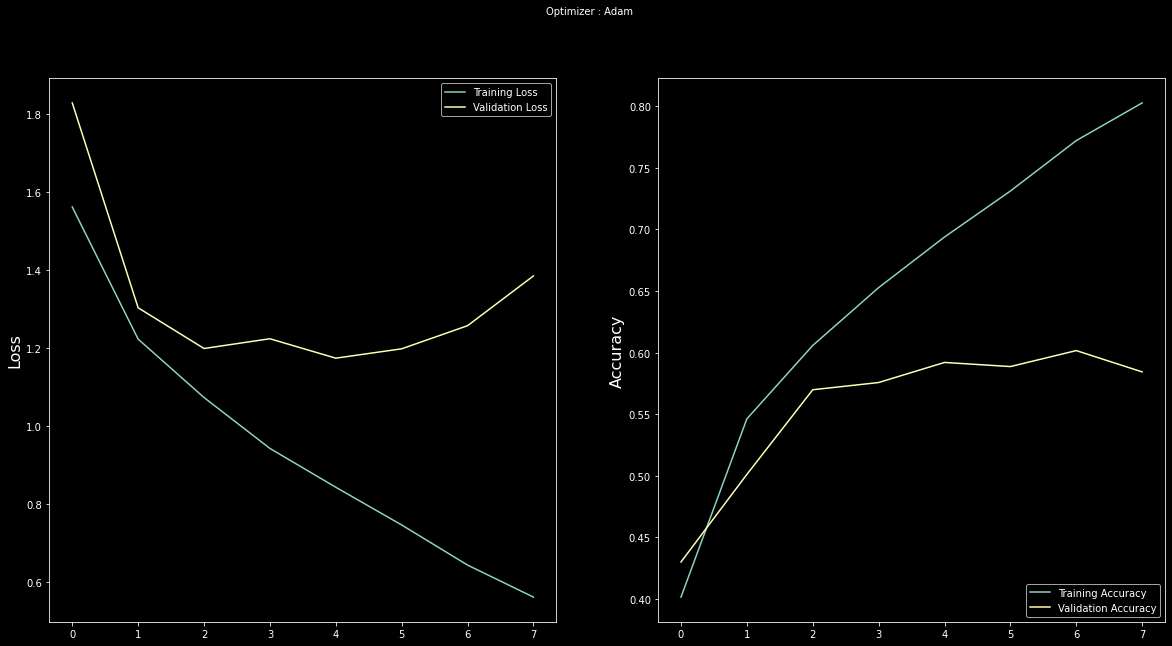

In [12]:
plotmodel(history)

angry: 



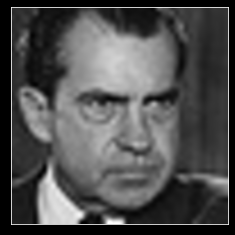

	angry ==> 60.94 %
	disgust ==> 1.08 %
	fear ==> 5.14 %
	happy ==> 0.97 %
	neutral ==> 19.25 %
	sad ==> 12.04 %
	surprise ==> 0.57 %
disgust: 



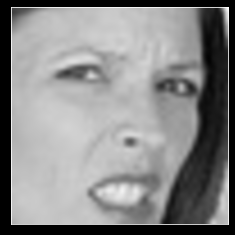

	angry ==> 29.07 %
	disgust ==> 18.29 %
	fear ==> 25.96 %
	happy ==> 2.68 %
	neutral ==> 4.45 %
	sad ==> 17.80 %
	surprise ==> 1.75 %
fear: 



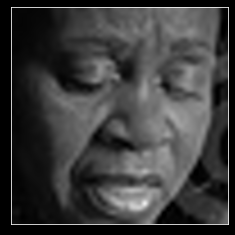

	angry ==> 9.07 %
	disgust ==> 0.78 %
	fear ==> 13.94 %
	happy ==> 0.64 %
	neutral ==> 9.66 %
	sad ==> 65.82 %
	surprise ==> 0.09 %
happy: 



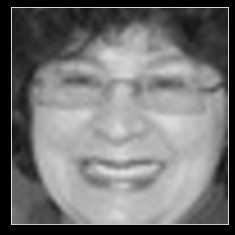

	angry ==> 0.00 %
	disgust ==> 0.00 %
	fear ==> 0.00 %
	happy ==> 99.92 %
	neutral ==> 0.07 %
	sad ==> 0.00 %
	surprise ==> 0.00 %
neutral: 



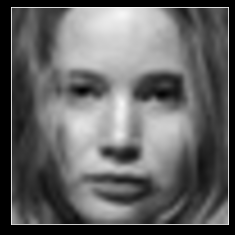

	angry ==> 22.85 %
	disgust ==> 0.32 %
	fear ==> 5.99 %
	happy ==> 5.62 %
	neutral ==> 51.79 %
	sad ==> 12.63 %
	surprise ==> 0.80 %
sad: 



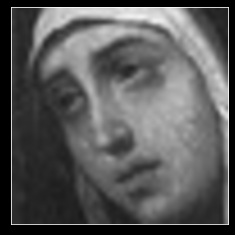

	angry ==> 7.67 %
	disgust ==> 0.18 %
	fear ==> 11.38 %
	happy ==> 1.77 %
	neutral ==> 41.36 %
	sad ==> 37.37 %
	surprise ==> 0.27 %
surprise: 



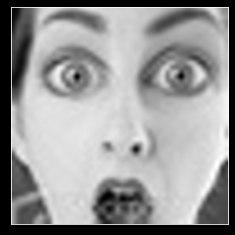

	angry ==> 0.00 %
	disgust ==> 0.00 %
	fear ==> 0.00 %
	happy ==> 0.00 %
	neutral ==> 0.00 %
	sad ==> 0.00 %
	surprise ==> 100.00 %


In [10]:
import cv2

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for j in range(len(emotions)):
  print(emotions[j] + ': \n')
  img = cv2.imread('/kaggle/input/ferdata/train/'+emotions[j]+ '/' + os.listdir("/kaggle/input/ferdata/train/"+emotions[j])[1])

  plt.imshow(img, interpolation='spline16')
  plt.xticks([]), plt.yticks([])
  plt.show()

  img = np.reshape(img, [1, 48, 48, 3])

  predict = model.predict(img)
  i = 0 
  for label in emotions:
    print("\t%s ==> %.2f %%" % (label, predict[0][i] * 100))
    i = i + 1 


In [14]:
import cv2

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Get a reference to webcam 
video_capture = cv2.VideoCapture(0)

# Initialize variables
face_locations = []

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    
    img = cv2.imread(frame)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = np.reshape(img, [1, 48, 48, 3])

    predict = model.predict(img)
    i = 0 
    for label in emotions:
        print("\t%s ==> %.2f %%" % (label, predict[0][i] * 100))
        i = i + 1 

    # Display the resulting image
    cv2.imshow('Video', frame)
    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

[ WARN:0] global /tmp/pip-req-build-0culq997/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [15]:
model.save('emotion_detection_model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
./emotion_detection_model.h5